In [16]:
# GPU
import os
from PIL import Image
from pathlib import Path
import shutil
from ultralytics import YOLO
from random import choice
from glob import glob
import xml.etree.ElementTree as ET
import cv2

# Suppress the specific FutureWarning
#warnings.filterwarnings("ignore", category=FutureWarning)
# Check if MPS (Mixed Precision Support) is available

### About the model

In [38]:
with open( Path('config.yaml')) as file:
    for i in file:
        print(i, end='')

path: /Users/work/Data/Planes/archive
train: Train/ 
val: Train/
task: detect
batch: 16
imgsz: 640
optimizer: auto

names: 
    0 : 'A1'
    1 : 'A2'
    2 : 'A3'
    3 : 'A4'
    4 : 'A5'
    5 : 'A6'
    6 : 'A7'
    7 : 'A8'
    8 : 'A9'
    9 : 'A10'
    10 : 'A11'
    11 : 'A12'
    12 : 'A13'
    13 : 'A14'
    14 : 'A15'
    15 : 'A16'
    16 : 'A17'
    17 : 'A18'
    18 : 'A19'
    19 : 'A20'



This is our configuration file. Nothing that out of the ordanary here. We specify the train and test set. Batch of 16 is more or less the standard. Auto optimizer, most likely ADAM but for the most part I dont worry about the optimizer until I need to incress preformance. Lastly the data set also has classes but were not going to use them this time.

# Making The Model 

### Code to Load a Pre Trained Model

In [7]:
# Load Model
model = YOLO(Path(r'./Model/Weights/best.pt'))

In [ ]:
model.

### Code to Train a model

In [ ]:
# Train Model
model = YOLO('yolov8n.pt') # Nano model
model.to('mps') # For macbook metal support 
model.train(data='config.yaml', epochs=5, device='mps') # See config file to see our model parameters 

### Code to See how our model reacts to a random image

/Users/work/Data/Planes/Test/2081.jpg


image 1/1 /Users/work/Data/Planes/Test/2081.jpg: 640x640 6 A1s, 61.9ms
Speed: 1.8ms preprocess, 61.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /opt/homebrew/runs/detect/predict3


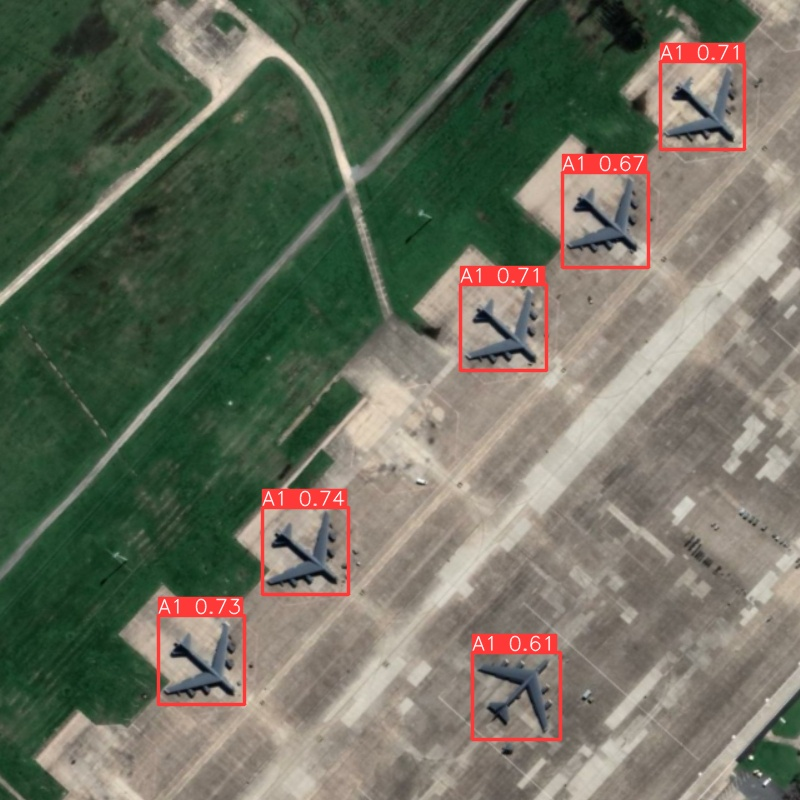

In [20]:
# Define path to the image file

data = Path(r'/Users/work/Data/Planes')
test = data / 'Test'
train = data / 'Train'


sample = Path(choice([ i for i in glob(str(test) + r'/*.jpg')]))
print(sample)



# Make predictions and get the Results object
results = model.predict(sample, save=True)
Image.open(results[0].save_dir + r'/' + sample.name)

As you can see the model look pretty good at detecting millitary planes from satellite. Now we need to be all little more precice with how the model preforms. Luckly for us yolo v8 does most of the work for us after we trained our model.

In [ ]:
### 

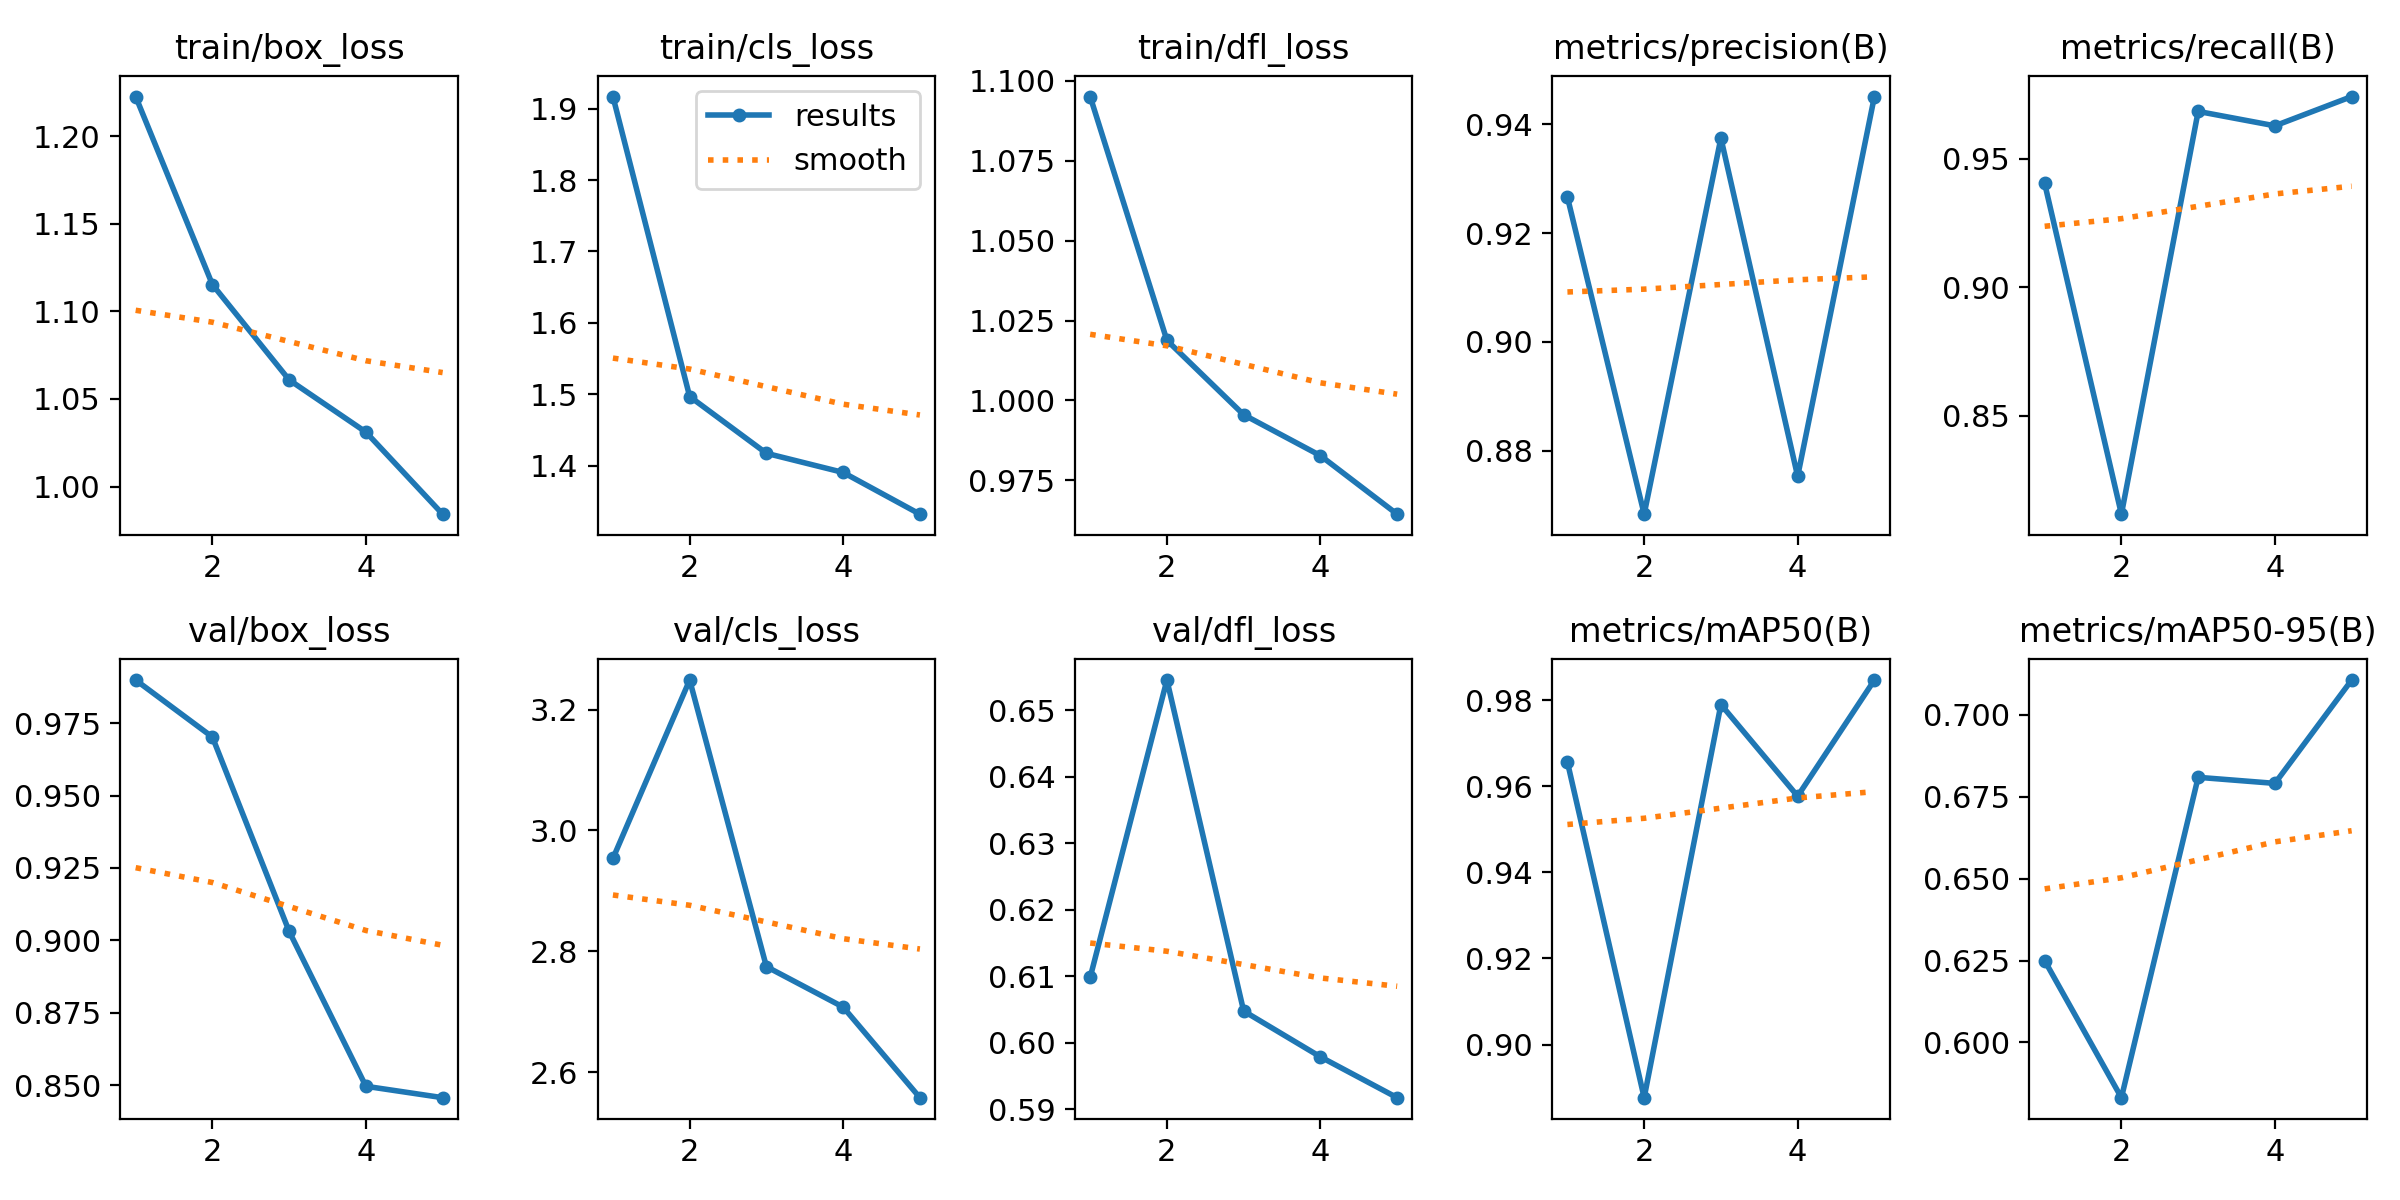

In [30]:
Image.open(Path(r'./Model/results.png')).convert('RGB')

Metrics to pay attention to is,

- Recall: As you can see we almost have perfect recall. This means given any image there is a good chance that we will detect all the planes. I am very happy with this result.

- Precision: This tells us how many of our geusses are right. As you can see we're at about 95%. Which is another really good result

# Conclusion 

All things concidered I think this project proves how capabul and easy to use yolo V8 is. With very little work and M2 macbook it was very simple to go from a data set to a working model. However its worth noteting that the ease of use also can back fire, because it can lead to someone creating a model without fully understanding the process, which may lead to problems that may not show up till its too late. 

In the future I would like to use this model on some open source satlight data to see if I can identify air fields automaticaly. 

In [40]:
%pip freeze

absl-py==1.4.0
anyio==4.2.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.2
bleach==6.1.0
boto3==1.14.63
botocore==1.17.63
cachetools==5.3.1
certifi @ file:///private/tmp/python-certifi-20231117-4919-2f0o9m/certifi-2023.11.17
cffi @ file:///private/tmp/cffi-20231014-5567-1hyue8f/cffi-1.16.0
charset-normalizer==3.2.0
click==8.1.7
comm==0.2.1
contourpy==1.1.0
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.7
dingpy==1.0.6
distro==1.8.0
docutils==0.15.2
executing==2.0.1
fastjsonschema==2.19.1
filelock==3.12.3
flatbuffers==23.5.26
fonttools==4.42.1
fqdn==1.5.1
fsspec==2023.10.0
gast==0.4.0
google-auth==2.23.0
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
grpcio==1.58.0
h5py==3.9.0
huggingface-hub==0.17.3
idna==3.4
ipykernel==6.28.0
ipython==8.19.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.2
jmespath==0.10.0
jo